In [13]:
#importing the important modules which we are going to use in
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output#to remove previous result from display
%matplotlib inline

In [14]:
data=pd.read_csv('housing.csv')#read our csv file whose name is housing.csv


In [15]:
print(data.head())#take a look on our data
data=data.dropna(axis=0)#we just remove the rows which have nan or empty rows

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [16]:
data.describe()#to know about our datasets

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [17]:
data.corr()#lets check the correlation between various features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [18]:
#just for the sake of simplicity we take only 2 features
features=data[['total_bedrooms','median_income']].copy()
target=data['median_house_value']

In [19]:
print(features.shape,"  ",target.shape)

(20433, 2)    (20433,)


In [20]:
#coverting our pandas dataframe into numpy array and then reshape it into suitable form 
target=np.array(target)
target=np.reshape(target,[1,len(target)])
features=np.array(features)
#here we are going to add 1 more line for maximum value normalisation
features=features/features.max()
target=target/target.max()
print(features.shape,"  ",target.shape)

(20433, 2)    (1, 20433)


In [21]:
def curve(m,x,c):#eqation of curve y=M0X0^1+M1X1^2+c
    return np.reshape((m[0]*x.T[0]+m[0]*(x.T[1]**2)+c),[1,20433])

m=[1,2]
c=2

def error(m,x,c,y):#now we are going to make error function ==>mean squared error
    return np.mean((curve(m,x,c)-y)**2,axis=1)

def derivative_m0(m,x,c,y):#now we are going to make derivative funtion for slope_m0
  return 2*np.mean(np.multiply((curve(m,x,c)-y), x.T[0]))

def derivative_m1(m,x,c,y):#now we are going to make derivative funtion for slope_m1
  return 2*np.mean(np.multiply((curve(m,x,c)-y), x.T[1]**2))

def derivative_inter(m,x,c,y):#now we are going to make derivative funtion for slope
  return 2*np.mean(curve(m,x,c)-y)

def accuracy(error, y):
  return 100- (error/np.mean(y**2))*100



In [22]:
m=np.random.randn(2,1)#randomly initialize value of m with the help of normal distribution
c=random.random()#take any random number as c
cost=[]#learning rate
alpha=0.1
for i in range(1000):
  cost.append(error(m,features,c,target))#append current error in cost, just to plot and visualize it
  m[0]=m[0]-alpha*derivative_m0(m,features,c,target)#m[0]=m[0]-learning_rate*d(error)/d(m[0])
  m[1]=m[1]-alpha*derivative_m1(m,features,c,target)#m[1]=m[1]-learning_rate*d(error)/d(m[1])
  c=c-alpha*derivative_inter(m,features,c,target)#c=c-learning_rate*d(error)/d(c)
  clear_output(True)
  print(i,' Current error : ',error(m,features,c,target),' Current Accuracy : ',accuracy(error(m,features,c,target), target) )
  

999  Current error :  [0.05418991]  Current Accuracy :  [75.85868708]


Text(0.5,1,'alpha=1')

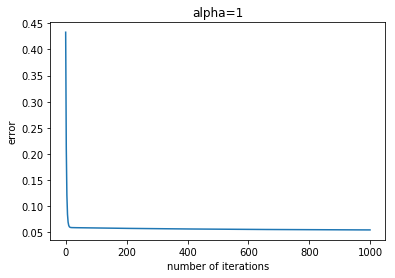

In [23]:
plt.plot(cost)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("alpha=1")